In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # ploting , visualization
import seaborn as sns # ploting
from sklearn import model_selection #scikit learn
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils
from sklearn import feature_selection

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6ddb24ebb7624cb8a24b809a517416ec = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='bxIhuH_glPTf4g4oDOESzYTy18YizfpBcbGugPKu5mn4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6ddb24ebb7624cb8a24b809a517416ec.get_object(Bucket='predictionoflifeexpectancyusingma-donotdelete-pr-zm8hil8io1svnl',Key='datasets_12603_17232_Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

In [23]:
df['Status']= le.fit_transform(df['Status']) 
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Cat
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1
5,Afghanistan,2010,1,58.8,279.0,74,0.01,79.679367,66.0,1989,...,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,1
6,Afghanistan,2009,1,58.6,281.0,77,0.01,56.762217,63.0,2861,...,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,1
7,Afghanistan,2008,1,58.1,287.0,80,0.03,25.873925,64.0,1599,...,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,1
8,Afghanistan,2007,1,57.5,295.0,82,0.02,10.910156,63.0,1141,...,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,1
9,Afghanistan,2006,1,57.3,295.0,84,0.03,17.171518,64.0,1990,...,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,1


In [24]:
X=df.drop(["Year","Country","Life expectancy "],axis=1)

In [25]:
X

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Cat
0,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1
5,1,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,1
6,1,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,1
7,1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,1
8,1,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,1
9,1,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,1


In [19]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Cat
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,...,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732,0.034138
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,...,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630,-0.442798
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,...,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171,0.278173
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,...,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372,0.108757
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,...,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975,-0.607782
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,...,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088,-0.461688
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,...,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182,-0.140351
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,...,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660,0.071963
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,...,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844,-0.298380
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,...,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013,0.109847


In [20]:
Y=df['Life expectancy ']

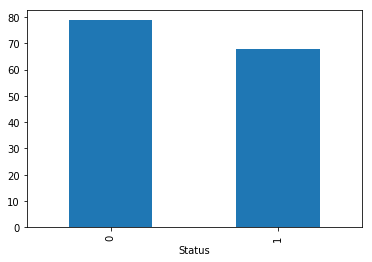

In [26]:
df.groupby('Status')['Life expectancy '].mean().plot.bar()

In [27]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

In [28]:
model=linear_model.LinearRegression()

In [29]:
model.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
predicted=model.predict(Xtest)

In [31]:
e=np.sqrt(np.mean((Ytest-predicted)**2))

In [32]:
e

3.7277034923141006

In [33]:
model.score(Xtrain,Ytrain)

0.8403734543285277

In [34]:
model.score(Xtest,Ytest)

0.8142465413326601

In [35]:
e1=(np.mean((Ytest-predicted)**2))

In [36]:
e1

13.895773326610742

In [37]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-16 04:43:23,671 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [39]:
wml_credentials = {
  "apikey": "XGic4OmC62qEgmkhYI5U9zVPY_95WNNpHI7xUM6wX_cm",
  "iam_apikey_description": "Auto-generated for key d03f37ab-6c97-4a4b-8fbe-89bd169e2e63",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/0fadf3a41e4444de835db3e9023e14bb::serviceid:ServiceId-94bcc27a-8ef3-4412-a116-e4d6cc0f9aed",
  "instance_id": "eef502e8-4064-4411-aaae-4bd5fa66b15f",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [40]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [42]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME : "Mohini",
    client.repository.ModelMetaNames.AUTHOR_EMAIL : "mohinidas2017@gmail.com",
    client.repository.ModelMetaNames.NAME : "Life Expectancy"
}

In [43]:
model_artifact = client.repository.store_model(model,meta_props=model_props)

In [44]:
model_artifact

{'metadata': {'guid': '4198a9c2-237e-4951-a28c-f3684ec2aea7',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eef502e8-4064-4411-aaae-4bd5fa66b15f/published_models/4198a9c2-237e-4951-a28c-f3684ec2aea7',
  'created_at': '2020-06-16T04:43:24.198Z',
  'modified_at': '2020-06-16T04:43:24.251Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eef502e8-4064-4411-aaae-4bd5fa66b15f/published_models/4198a9c2-237e-4951-a28c-f3684ec2aea7/learning_configuration',
  'author': {'name': 'Mohini'},
  'name': 'Life Expectancy',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eef502e8-4064-4411-aaae-4bd5fa66b15f/published_models/4198a9c2-237e-4951-a28c-f3684ec2aea7/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eef502e8-4064-4411-aaae-4bd5fa66b15f/published_models/4198a9c2-237e-4951-a28c-f3684ec2aea7/feedback',
  'latest_version': {'url': 'h

In [45]:
guid=client.repository.get_model_uid(model_artifact)

In [46]:
guid

'4198a9c2-237e-4951-a28c-f3684ec2aea7'

In [47]:
deploy=client.deployments.create(guid,name="Prediction of life expectancy using Machine Learning")



#######################################################################################

Synchronous deployment creation for uid: '4198a9c2-237e-4951-a28c-f3684ec2aea7' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f2e4af8f-3ff1-45e1-acce-5ce8a1183df2'
------------------------------------------------------------------------------------------------




In [48]:
client.deployments.list()

------------------------------------  ----------------------------------------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                                                  TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
f2e4af8f-3ff1-45e1-acce-5ce8a1183df2  Prediction of life expectancy using Machine Learning  online  DEPLOY_SUCCESS  2020-06-16T04:45:00.435Z  scikit-learn-0.20  model
c5374fd0-6139-4118-91d8-f7917260dc18  Wind energy prediction                                online  DEPLOY_SUCCESS  2020-06-14T04:48:35.402Z  scikit-learn-0.20  model
------------------------------------  ----------------------------------------------------  ------  --------------  ------------------------  -----------------  -------------


In [49]:
deploy

{'metadata': {'guid': 'f2e4af8f-3ff1-45e1-acce-5ce8a1183df2',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eef502e8-4064-4411-aaae-4bd5fa66b15f/deployments/f2e4af8f-3ff1-45e1-acce-5ce8a1183df2',
  'created_at': '2020-06-16T04:45:00.435Z',
  'modified_at': '2020-06-16T04:45:00.661Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Prediction of life expectancy using Machine Learning',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eef502e8-4064-4411-aaae-4bd5fa66b15f/deployments/f2e4af8f-3ff1-45e1-acce-5ce8a1183df2/online',
  'deployable_asset': {'name': 'Life Expectancy',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eef502e8-4064-4411-aaae-4bd5fa66b15f/published_models/4198a9c2-237e-4951-a28c-f3684ec2aea7',
   'guid': '4198a9c2-237e-4951-a28c-f3684ec2aea7',
   'created_at': '2020-06-16T04:45:00.410Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_ty

In [50]:
scoring_url=client.deployments.get_scoring_url(deploy)

In [51]:
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/eef502e8-4064-4411-aaae-4bd5fa66b15f/deployments/f2e4af8f-3ff1-45e1-acce-5ce8a1183df2/online'